1) Import all the packages needed for the python portion of this project

For this project we will be using: 
- pandas to store and handle data 
- numpy, Sckit-Learn, and statsmodels for statistical analysis and mathematical computations
- Matplotlib and Seaborn for Data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

2) Creating a pandas dataframe out of the Happiness and the alchohol consumption file and then joining the column from the alchohol column using the join statement

In [23]:
df_2019 = pd.read_csv('/Users/misaalsingh/Downloads/Full_Table.csv')
df_2019.columns = ['Year', 'Rank', 'Country', 'Happiness Score', 'GDP per Capita', 
                   'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 
                   'Corruption', 'Alcohol Consumption', 'Gas Emissions']
df_2019

,Year,Rank,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Alcohol Consumption,Gas Emissions
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,10.78,51.30
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,10.26,34.23
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.41,18.43
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,9.12,2.11
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,9.61,152.52
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,8.95,2.73
140,2019,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,11.27,75.68
141,2019,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0.21,7.59
142,2019,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.38,14.31


In [25]:
df_2019 = df_2019.fillna(6.165743055555556)
df_2019

,Year,Rank,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Alcohol Consumption,Gas Emissions
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,10.780000,51.30
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,10.260000,34.23
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.410000,18.43
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,9.120000,2.11
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,9.610000,152.52
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,8.950000,2.73
140,2019,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,11.270000,75.68
141,2019,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0.210000,7.59
142,2019,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.380000,14.31


Running a simple linear regression and taking the regression summary to find the correlation of each column to happiness

In [6]:
x = df_2019['GDP per Capita'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              1890.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                    1.09e-84
Time:                        16:10:15   Log-Likelihood:                         -264.88
No. Observations:                 145   AIC:                                      531.8
Df Residuals:                     144   BIC:                                      534.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3552      0.123     43.474      0.000       5.112       5.599
==============================================================================
Omnibus:                        7.544   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.920
Skew:                           0.559   Prob(JB):                       0.0191
Kurtosis:                       2.752   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of GDP to happiness is about .963

In [7]:
x = df_2019['Social Support'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              7561.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                   2.41e-126
Time:                        16:10:15   Log-Likelihood:                         -168.32
No. Observations:                 145   AIC:                                      338.6
Df Residuals:                     144   BIC:                                      341.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.3960      0.051     86.953      0.000       4.296       4.496
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.528
Skew:                           0.294   Prob(JB):                       0.0630
Kurtosis:                       3.754   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Social Support to happiness is about .99

In [8]:
x = df_2019['Life Expectancy'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              3376.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                   7.60e-102
Time:                        16:10:15   Log-Likelihood:                         -225.11
No. Observations:                 145   AIC:                                      452.2
Df Residuals:                     144   BIC:                                      455.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.0654      0.122     58.105      0.000       6.825       7.306
==============================================================================
Omnibus:                       15.925   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.775
Skew:                           0.677   Prob(JB):                     5.08e-05
Kurtosis:                       4.201   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Healthy Life Expectancy to happiness is about .979

In [9]:
x = df_2019['Freedom'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              2037.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                    7.16e-87
Time:                        16:10:15   Log-Likelihood:                         -259.82
No. Observations:                 145   AIC:                                      521.6
Df Residuals:                     144   BIC:                                      524.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.8628      0.285     45.134      0.000      12.299      13.426
==============================================================================
Omnibus:                        4.327   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.850
Skew:                           0.381   Prob(JB):                        0.146
Kurtosis:                       3.241   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Freedom to make life choices to Happiness is .965

In [10]:
x = df_2019['Corruption'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              262.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                    2.91e-34
Time:                        16:10:15   Log-Likelihood:                         -381.61
No. Observations:                 145   AIC:                                      765.2
Df Residuals:                     144   BIC:                                      768.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.4168      1.939     16.202      0.000      27.584      35.249
==============================================================================
Omnibus:                       29.303   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.225
Skew:                          -1.131   Prob(JB):                     1.84e-09
Kurtosis:                       4.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Perceptions of Corruption to Happiness is .804

In [11]:
x = df_2019['Gas Emissions'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.099
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              15.82
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                    0.000110
Time:                        16:10:15   Log-Likelihood:                         -449.30
No. Observations:                 145   AIC:                                      900.6
Df Residuals:                     144   BIC:                                      903.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019      0.000      3.977      0.000       0.001       0.003
==============================================================================
Omnibus:                      236.000   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25867.496
Skew:                          -7.042   Prob(JB):                         0.00
Kurtosis:                      66.900   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Gas Emissions to Happiness is about .315

In [12]:
x = df_2019['Alcohol Consumption'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              292.7
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                    1.64e-36
Time:                        16:10:15   Log-Likelihood:                         -376.41
No. Observations:                 145   AIC:                                      754.8
Df Residuals:                     144   BIC:                                      757.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6258      0.037     17.110      0.000       0.553       0.698
==============================================================================
Omnibus:                       11.934   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.562
Skew:                          -0.089   Prob(JB):                        0.102
Kurtosis:                       2.150   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Alcohol Consumption to Happiness is .82


3) Create a plot that visually shows a scatter plot with the line of best fit moving through it

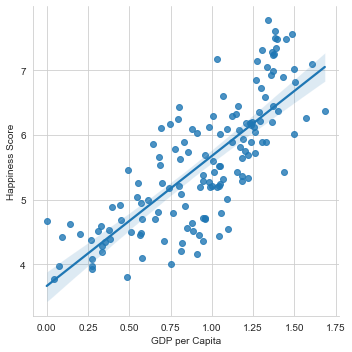

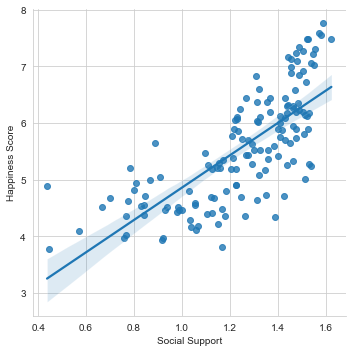

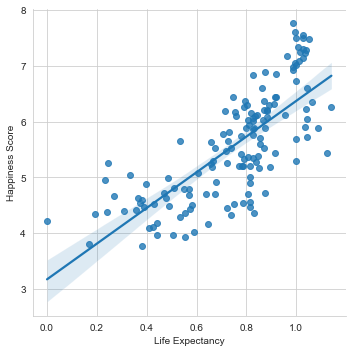

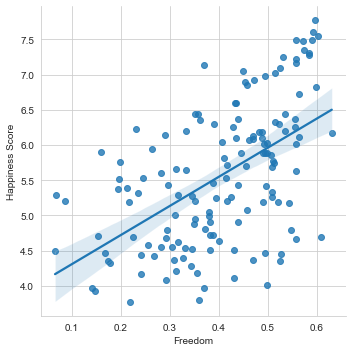

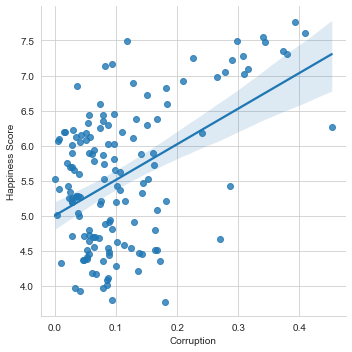

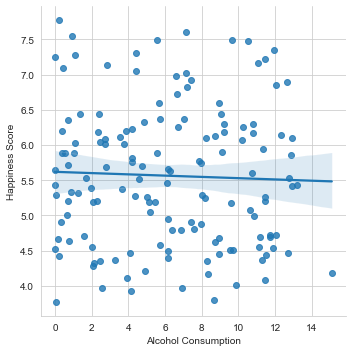

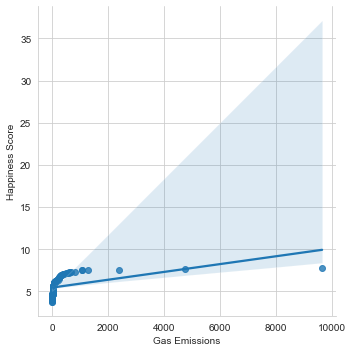

In [13]:
sns.set_style('whitegrid')

sns.lmplot(x ='GDP per Capita', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Social Support', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Life Expectancy', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Freedom', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Corruption', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Alcohol Consumption', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Gas Emissions', y ='Happiness Score', data = df_2019)

Creating a histogram to measure frequencies of data

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

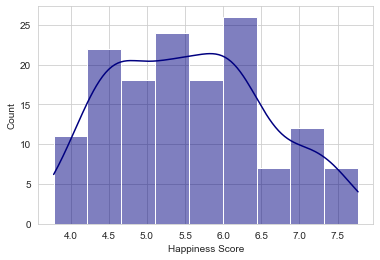

In [14]:
sns.histplot(data = df_2019
            ,x = 'Happiness Score'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='GDP per Capita', ylabel='Count'>

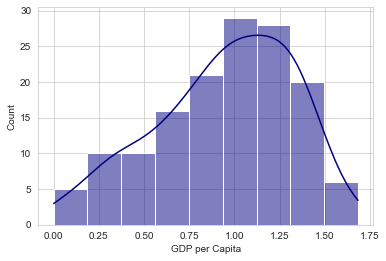

In [15]:
sns.histplot(data = df_2019
            ,x = 'GDP per Capita'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Social Support', ylabel='Count'>

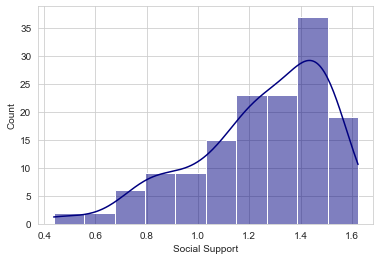

In [16]:
sns.histplot(data = df_2019
            ,x = 'Social Support'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Life Expectancy', ylabel='Count'>

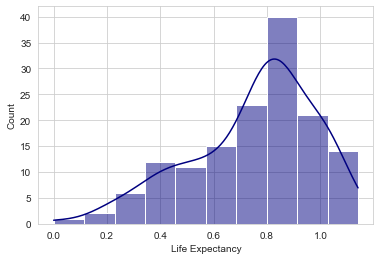

In [17]:
sns.histplot(data = df_2019
            ,x = 'Life Expectancy'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Freedom', ylabel='Count'>

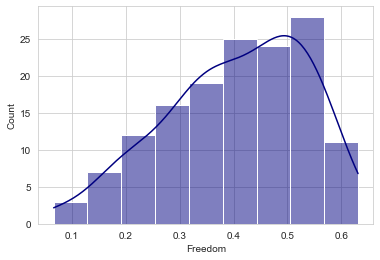

In [18]:
sns.histplot(data = df_2019
            ,x = 'Freedom'
            ,color = 'navy'
            ,kde = True
            )



<AxesSubplot:xlabel='Corruption', ylabel='Count'>

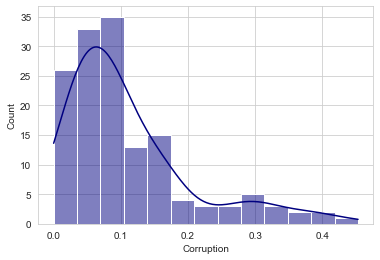

In [19]:
sns.histplot(data = df_2019
            ,x = 'Corruption'
            ,color = 'navy'
            ,kde = True
            )

<AxesSubplot:xlabel='Alcohol Consumption', ylabel='Count'>

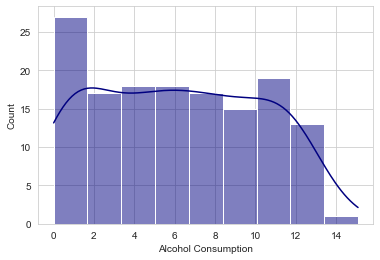

In [20]:
sns.histplot(data = df_2019
            ,x = 'Alcohol Consumption'
            ,color = 'navy'
            ,kde = True
            )

<AxesSubplot:xlabel='Gas Emissions', ylabel='Count'>

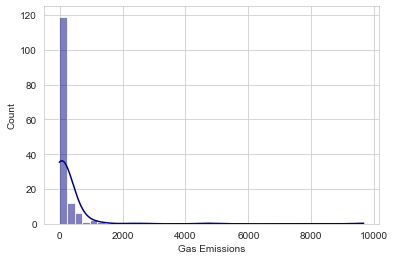

In [29]:
sns.histplot(data = df_2019
            ,x = 'Gas Emissions'
            ,color = 'navy'
            ,kde = True
            ,bins = 40
            )